<a href="https://colab.research.google.com/github/Jason-Durr/AIFinalProject/blob/master/HW/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasondurr","key":"a288e7df4fa66f235cefea7adda21090"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d harishvutukuri/dogs-vs-wolves
!unzip /content/dogs-vs-wolves.zip >&null

 97% 216M/222M [00:01<00:00, 137MB/s]
100% 222M/222M [00:01<00:00, 124MB/s]


In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf



max = np.array([2000,3000,4])

img_height = 200
img_width = 200

train_x = []
train_y = []

data_dir = "/content/data/"

train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.2,
            subset="training",
            seed=123,
            image_size=(img_height, img_width),
            batch_size=128)

val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.2,
            subset="validation",
            seed=123,
            image_size=(img_height, img_width),
            batch_size=128)


Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['dogs', 'wolves']


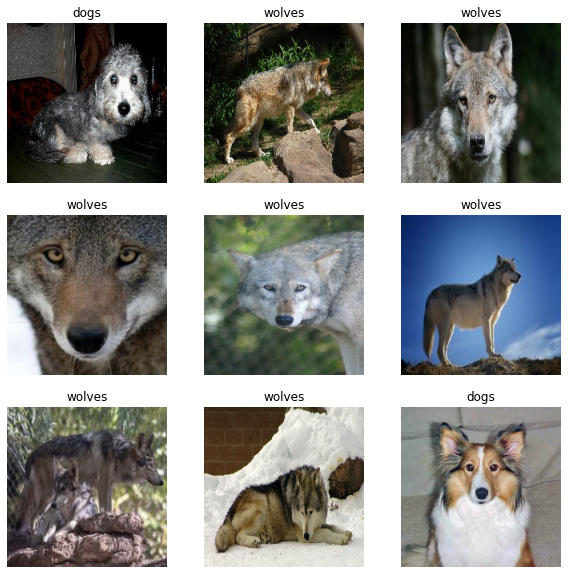

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
13/13 [==============================] - 80s 6s/step - loss: 0.9381 - accuracy: 0.4475 - val_loss: 0.6898 - val_accuracy: 0.5125
Epoch 2/30
13/13 [==============================] - 71s 6s/step - loss: 0.6472 - accuracy: 0.6237 - val_loss: 0.6318 - val_accuracy: 0.6300
Epoch 3/30
13/13 [==============================] - 71s 5s/step - loss: 0.5972 - accuracy: 0.6850 - val_loss: 0.6015 - val_accuracy: 0.6800
Epoch 4/30
13/13 [==============================] - 74s 6s/step - loss: 0.5476 - accuracy: 0.7362 - val_loss: 0.5517 - val_accuracy: 0.7375
Epoch 5/30
13/13 [==============================] - 73s 6s/step - loss: 0.4792 - accuracy: 0.8050 - val_loss: 0.5130 - val_accuracy: 0.7650
Epoch 6/30
13/13 [==============================] - 73s 6s/step - loss: 0.4301 - accuracy: 0.8044 - val_loss: 0.5311 - val_accuracy: 0.7400
Epoch 7/30
13/13 [==============================] - 73s 6s/step - loss: 0.3810 - accuracy: 0.8356 - val_loss: 0.5578 - val_accuracy: 0.7450
Epoch 8/30
13/13 [==

In [ ]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
13/13 [==============================] - 73s 5s/step - loss: 1.5196 - accuracy: 0.5088 - val_loss: 0.7344 - val_accuracy: 0.6350
Epoch 2/30
13/13 [==============================] - 70s 5s/step - loss: 0.6648 - accuracy: 0.6131 - val_loss: 0.6280 - val_accuracy: 0.6675
Epoch 3/30
13/13 [==============================] - 70s 5s/step - loss: 0.5772 - accuracy: 0.7119 - val_loss: 0.6458 - val_accuracy: 0.6375
Epoch 4/30
13/13 [==============================] - 70s 5s/step - loss: 0.5082 - accuracy: 0.7494 - val_loss: 0.5560 - val_accuracy: 0.7200
Epoch 5/30
13/13 [==============================] - 69s 5s/step - loss: 0.4629 - accuracy: 0.7831 - val_loss: 0.5588 - val_accuracy: 0.7075
Epoch 6/30
13/13 [==============================] - 69s 5s/step - loss: 0.4054 - accuracy: 0.8163 - val_loss: 0.5504 - val_accuracy: 0.7250
Epoch 7/30
13/13 [==============================] - 70s 5s/step - loss: 0.3168 - accuracy: 0.8788 - val_loss: 0.5636 - val_accuracy: 0.6950
Epoch 8/30
13/13 [==

# Part 1



Since this is a basic image classification problem I tried using 2 and 3 convolutional layers followed by one 128 node hidden layer and then the output layer.  Then after testing, the 3 convolutional layer network preformed better so I chose this network.  The final result of this shows over fitting with the in sample accuracy reaching 100% but the validation accuracy was only 73% after declining from its peak of 77%.  This happens fairly quickly, after just 10 epochs.

In [18]:
base_Model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(200,200,3), pooling=None, classes=2,
    classifier_activation='softmax'
)

for layer in base_Model.layers:
  layer.trainable = False

In [20]:
num_classes = 2

our_model = tf.keras.layers.Flatten()(base_Model.output)
our_model = tf.keras.layers.Dense(128, activation='relu')(our_model)
our_model = tf.keras.layers.Dense(num_classes)(our_model)

pretrained = tf.keras.Model(base_Model.input,our_model)

In [23]:
pretrained.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
pretrained.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
13/13 [==============================] - 151s 11s/step - loss: 24.6696 - accuracy: 0.6263 - val_loss: 7.2466 - val_accuracy: 0.6850
Epoch 2/30
13/13 [==============================] - 146s 11s/step - loss: 5.5124 - accuracy: 0.6594 - val_loss: 4.2563 - val_accuracy: 0.5875
Epoch 3/30
13/13 [==============================] - 145s 11s/step - loss: 2.1346 - accuracy: 0.7237 - val_loss: 2.3872 - val_accuracy: 0.6400
Epoch 4/30
13/13 [==============================] - 147s 11s/step - loss: 0.9642 - accuracy: 0.7825 - val_loss: 1.7294 - val_accuracy: 0.6325
Epoch 5/30
13/13 [==============================] - 146s 11s/step - loss: 0.7677 - accuracy: 0.7919 - val_loss: 2.4286 - val_accuracy: 0.6200
Epoch 6/30
13/13 [==============================] - 146s 11s/step - loss: 0.6413 - accuracy: 0.8075 - val_loss: 2.8565 - val_accuracy: 0.5650
Epoch 7/30
13/13 [==============================] - 146s 11s/step - loss: 0.7795 - accuracy: 0.7919 - val_loss: 6.7229 - val_accuracy: 0.5175
Epoch

# Part 2

Here we see that the accuraccy starts off faster, however it quickly begins to overfit suggesting that the size of the data is not enough to train this model and data augmentation teechniques would need to be used.

In [ ]:
model3 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
13/13 [==============================] - 87s 6s/step - loss: 0.7362 - accuracy: 0.5069 - val_loss: 0.6908 - val_accuracy: 0.5275
Epoch 2/100
13/13 [==============================] - 77s 6s/step - loss: 0.6898 - accuracy: 0.5319 - val_loss: 0.6806 - val_accuracy: 0.5350
Epoch 3/100
13/13 [==============================] - 77s 6s/step - loss: 0.6726 - accuracy: 0.6037 - val_loss: 0.6649 - val_accuracy: 0.6050
Epoch 4/100
13/13 [==============================] - 77s 6s/step - loss: 0.6388 - accuracy: 0.6381 - val_loss: 0.6269 - val_accuracy: 0.6475
Epoch 5/100
13/13 [==============================] - 77s 6s/step - loss: 0.6047 - accuracy: 0.6856 - val_loss: 0.5964 - val_accuracy: 0.7075
Epoch 6/100
13/13 [==============================] - 77s 6s/step - loss: 0.5912 - accuracy: 0.6956 - val_loss: 0.5829 - val_accuracy: 0.7125
Epoch 7/100
13/13 [==============================] - 77s 6s/step - loss: 0.5748 - accuracy: 0.7212 - val_loss: 0.5666 - val_accuracy: 0.7275
Epoch 8/100
1

# Part 3
This time it took much longer to get good in sample accuracy but at the same time the train and validation accuaracy remained much closer throughout the training suggesting there was less overfitting. Additionally, the validation accuracy was several points higher when I early stopped the training.